In [4]:
from data_download_tool import download_data
from annotation_viewer import plot_annotations, plot_annotation_subset
from pandas_statistics import file_path_loader, satsim_path_loader, PDStatistics_calculator
from plots import *
import os


In [5]:
satsim_path = "/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output"
local_satsim = satsim_path_loader(satsim_path)


/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/output_statistics.pkl


Loading folders: 100%|██████████| 169/169 [00:09<00:00, 18.66it/s]


## Plots

file
numerical


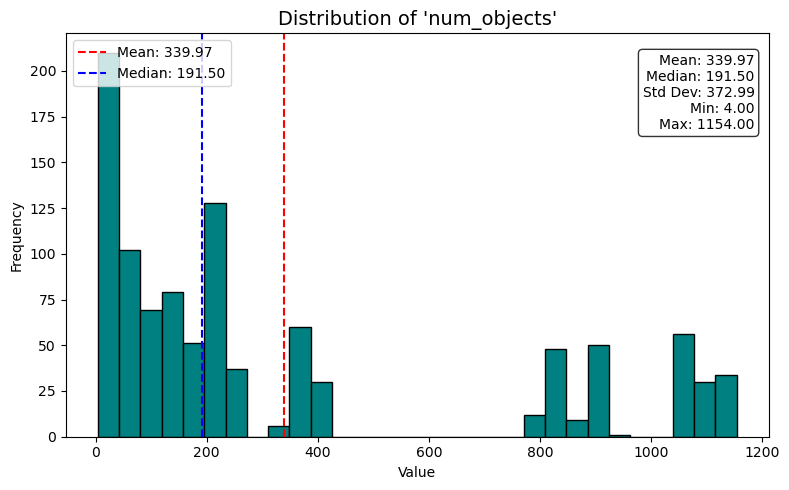

categorical


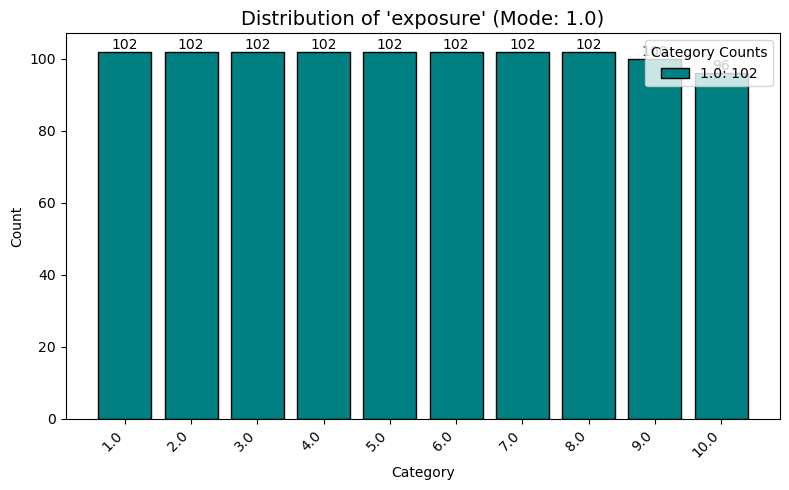

numerical


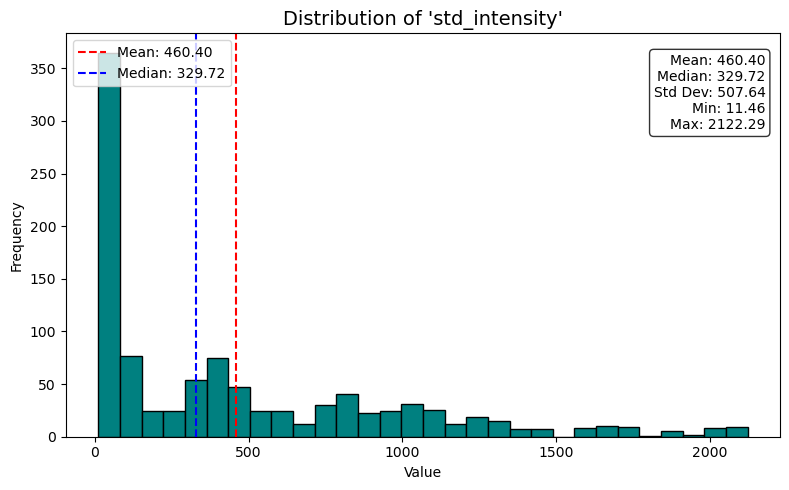

numerical


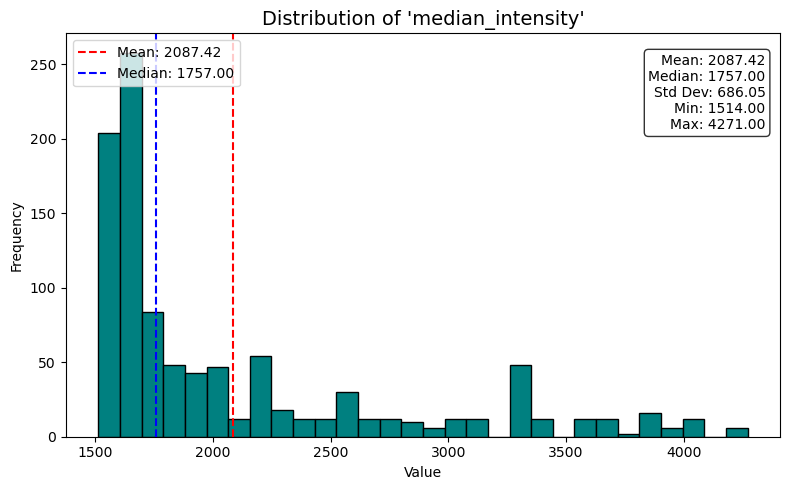

categorical


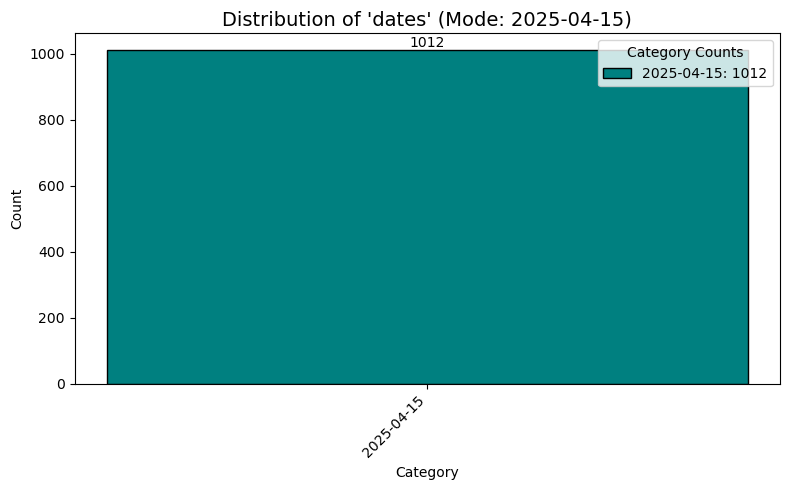

time


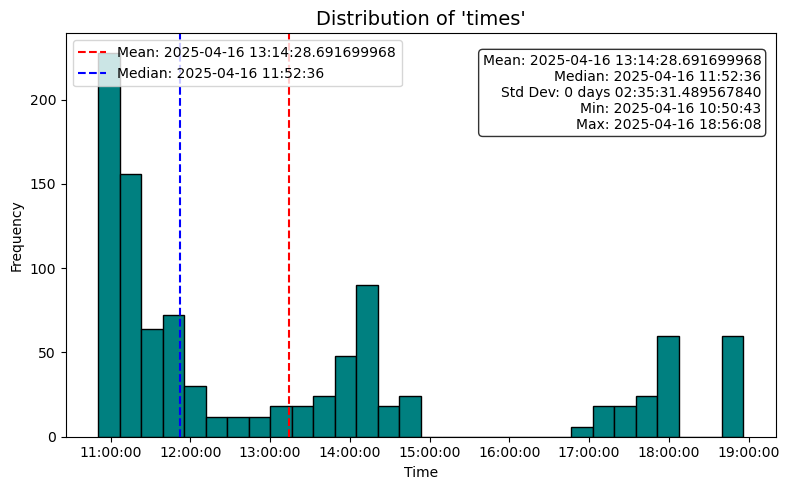

numerical


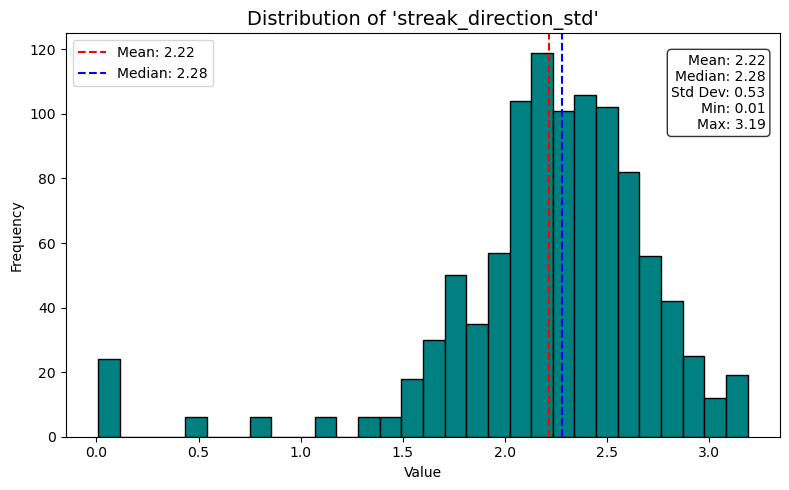

numerical


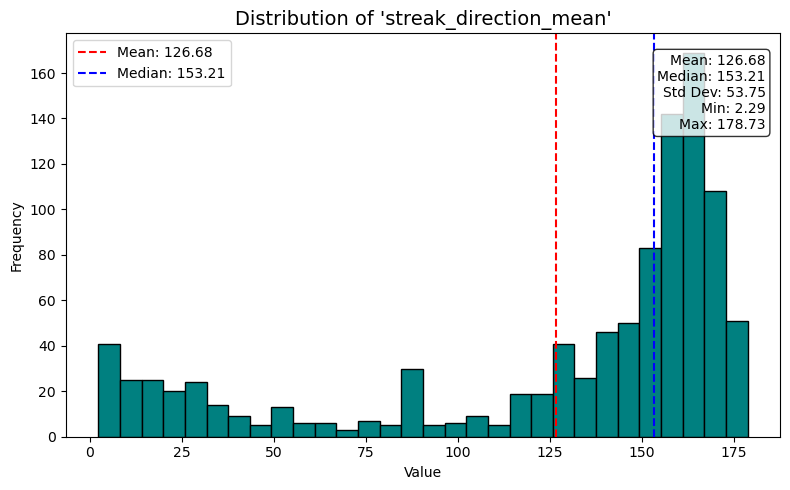

numerical


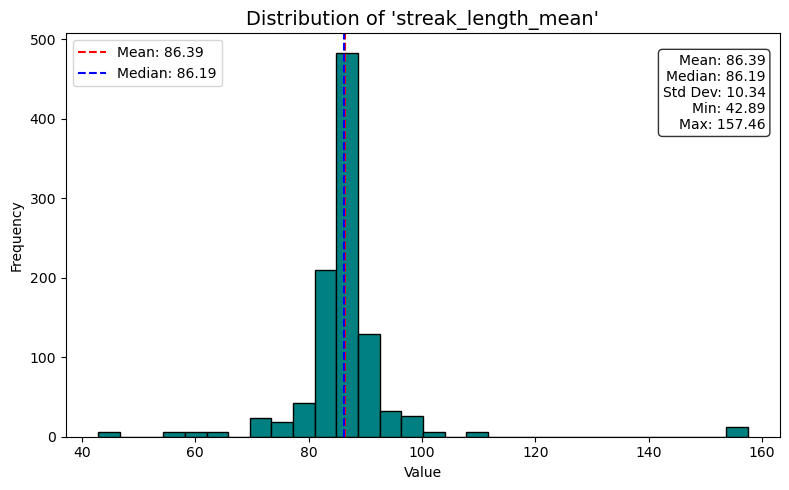

numerical


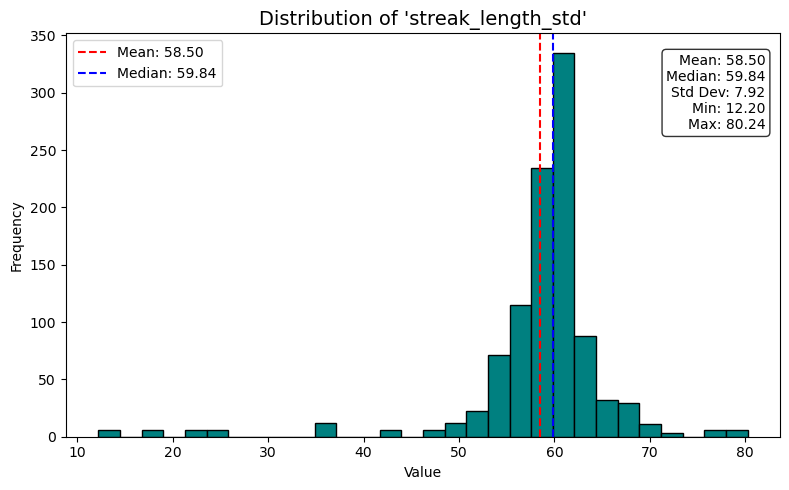

numerical


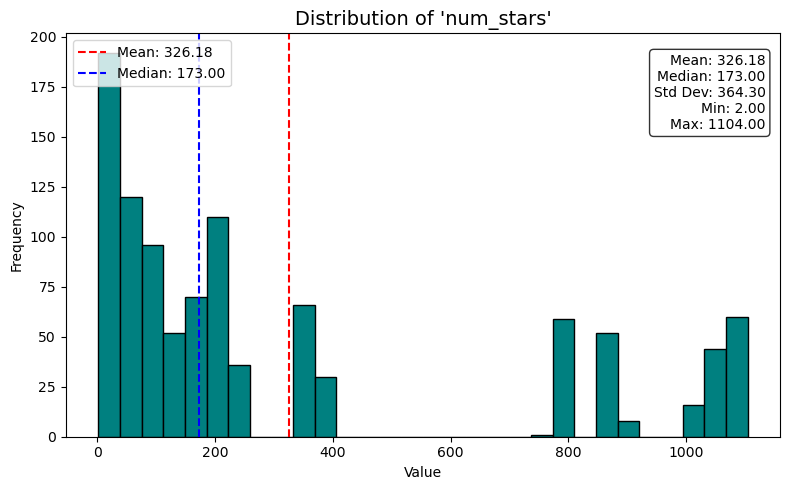

categorical


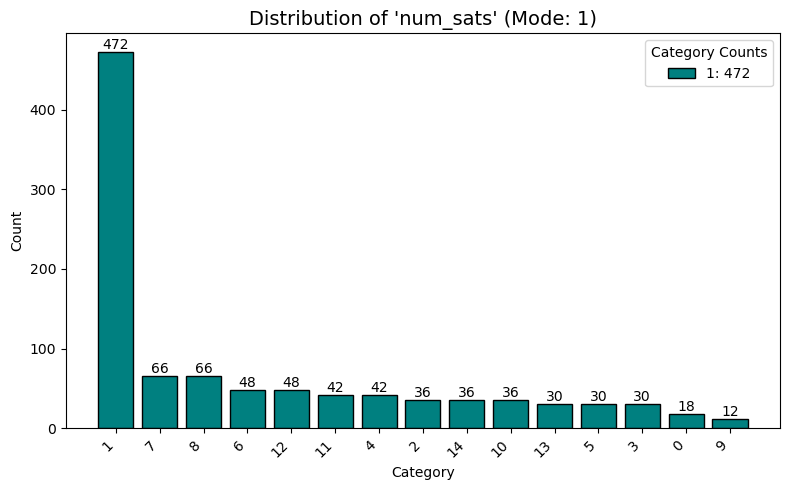

file
file


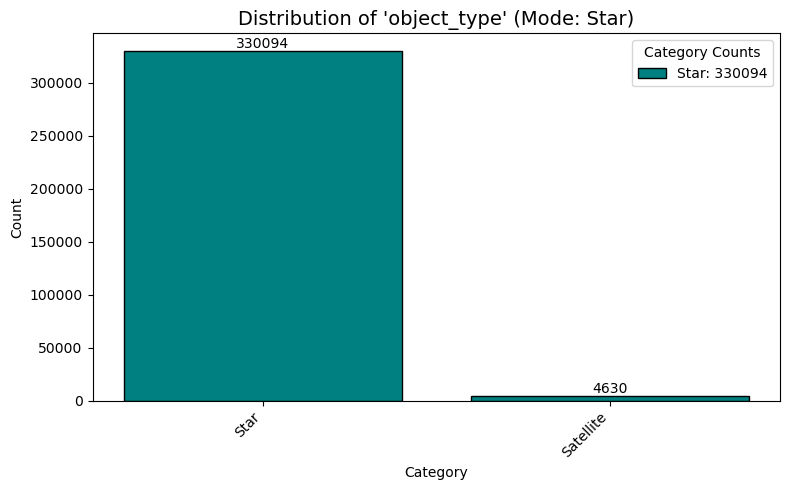

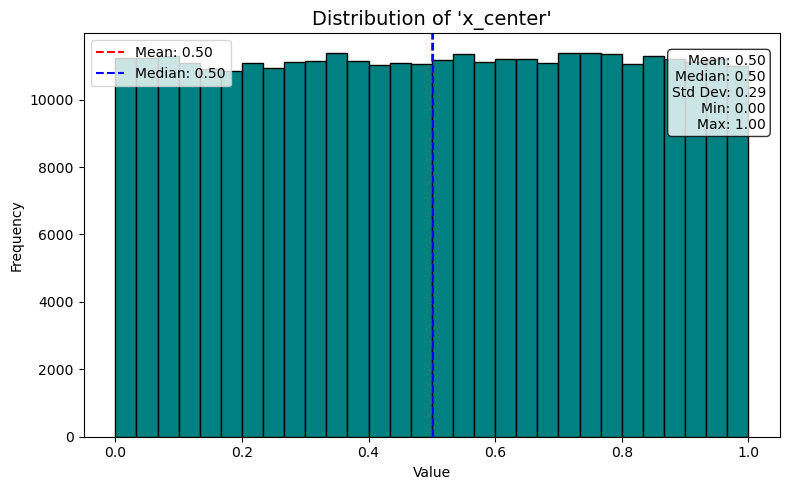

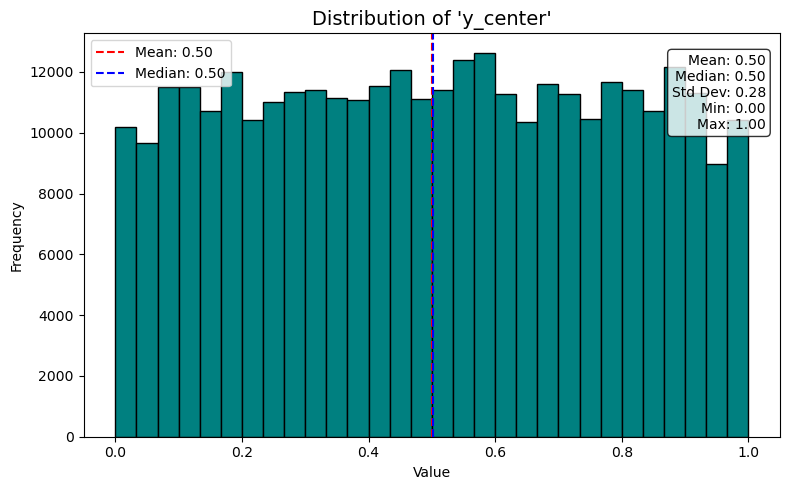

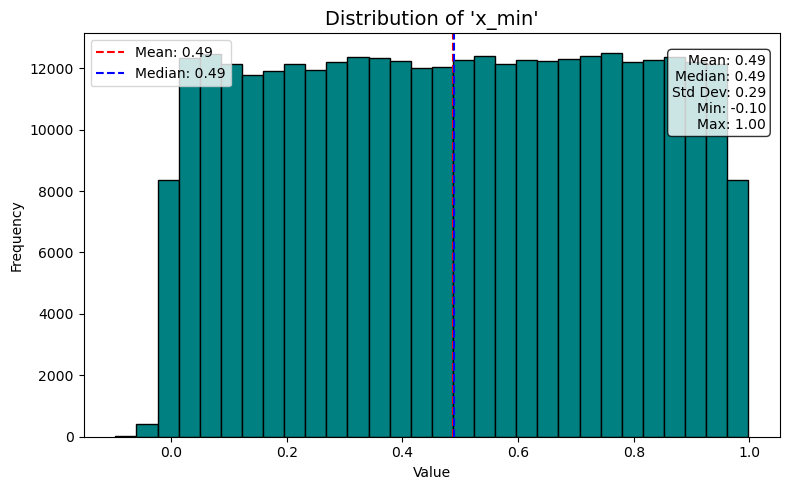

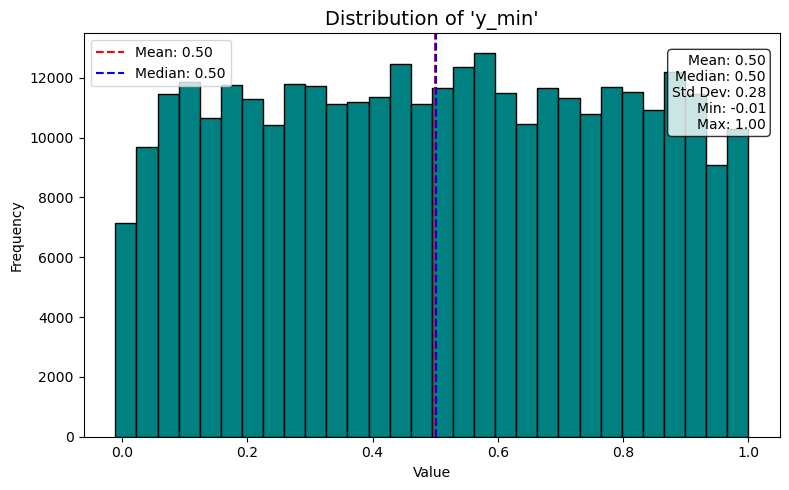

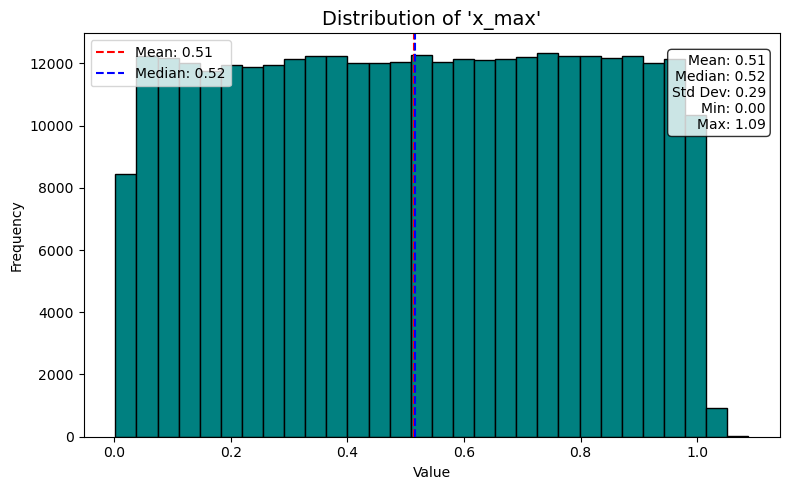

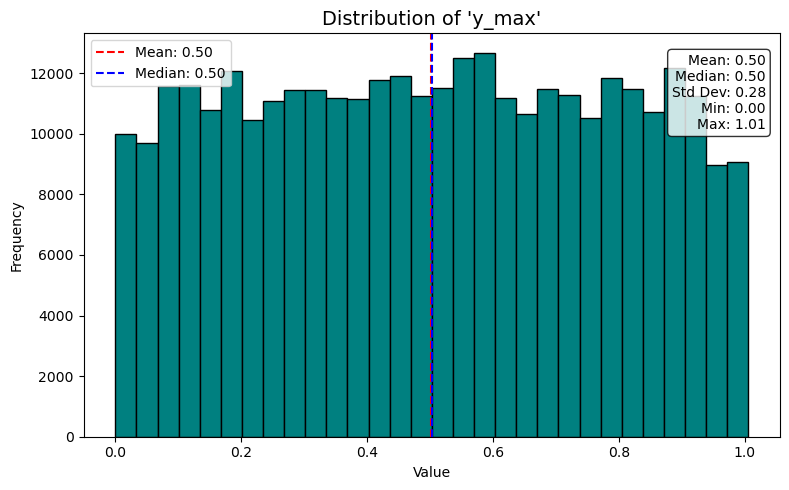

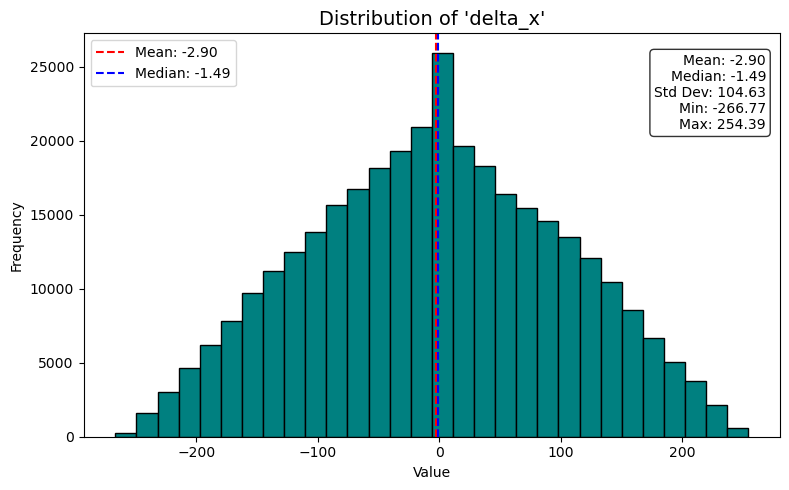

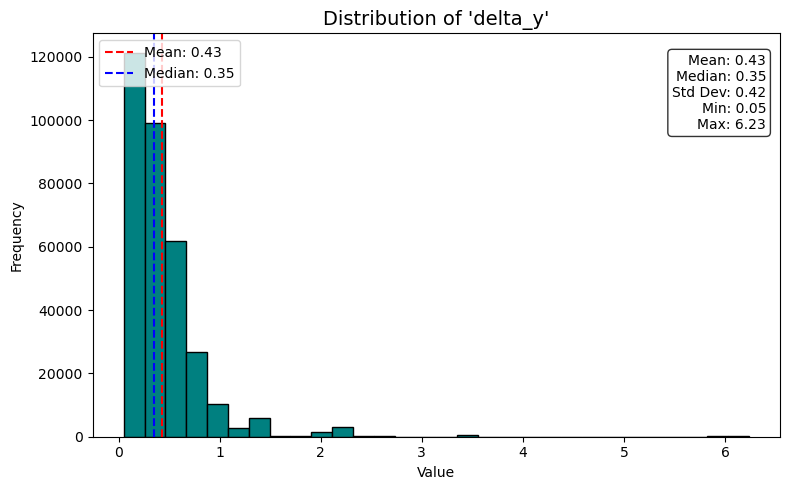

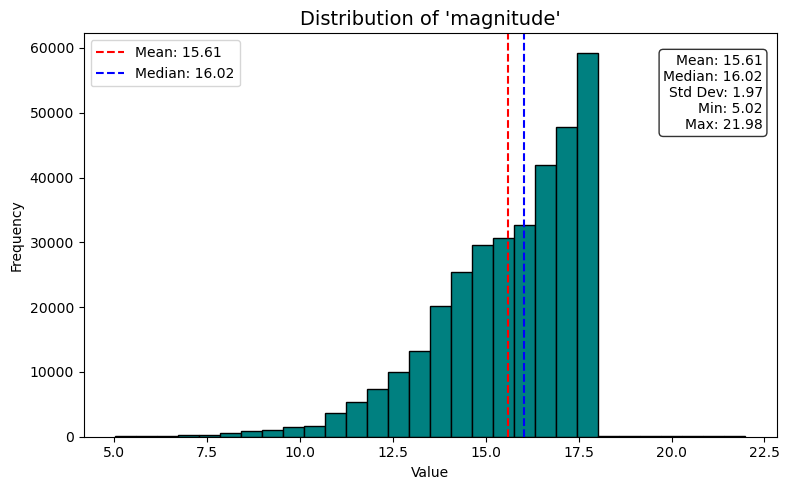

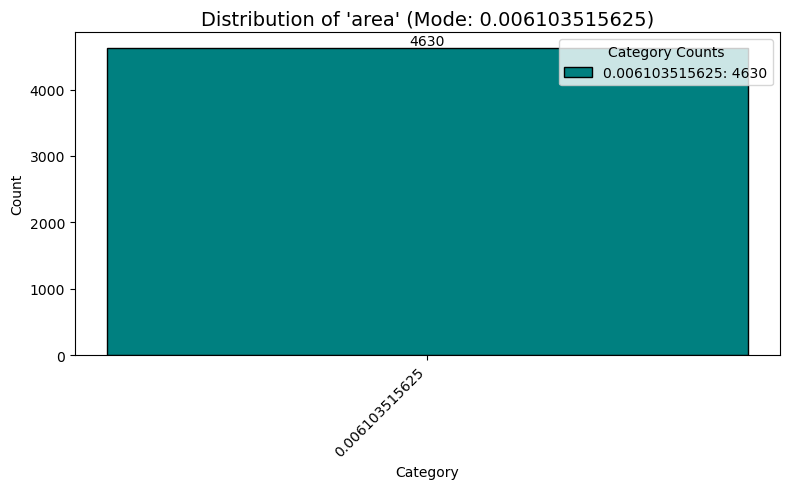

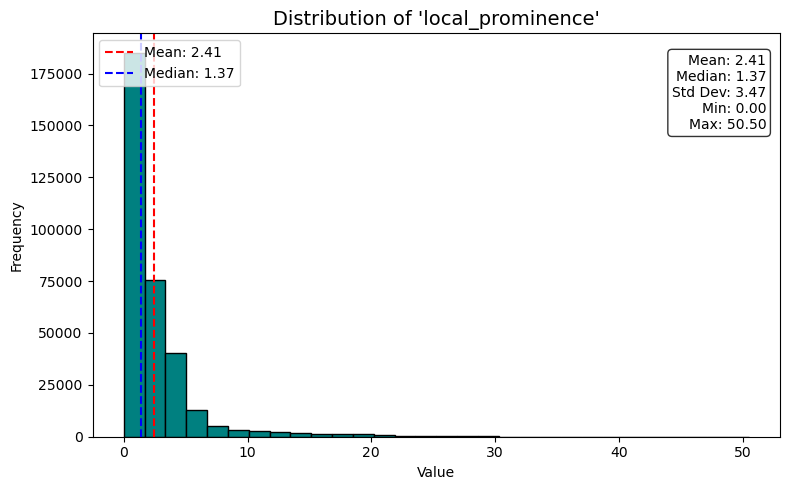

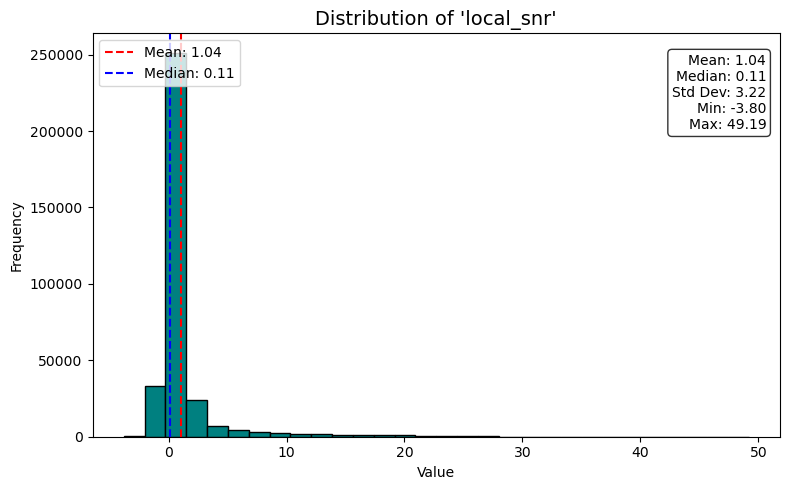

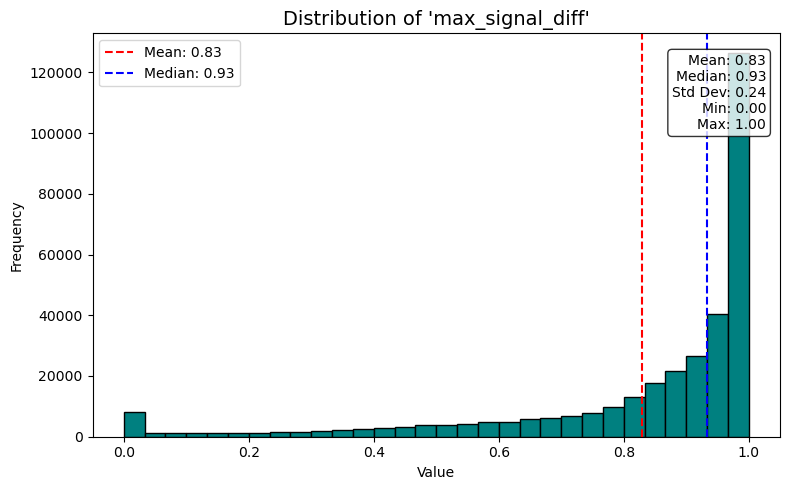

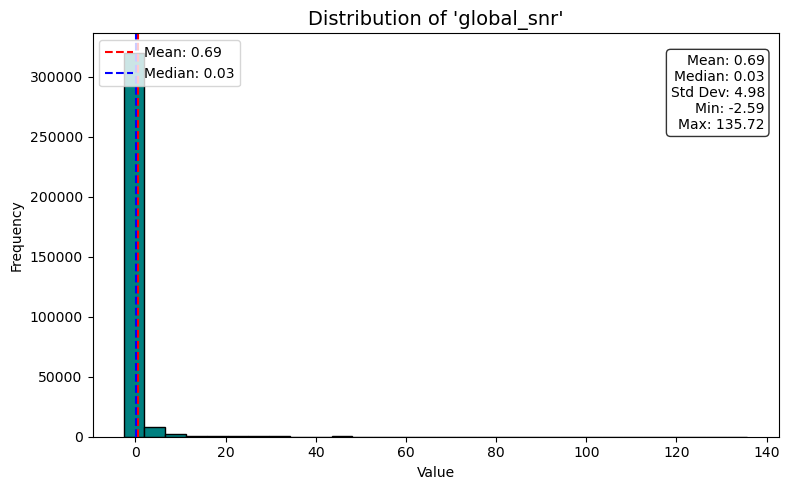

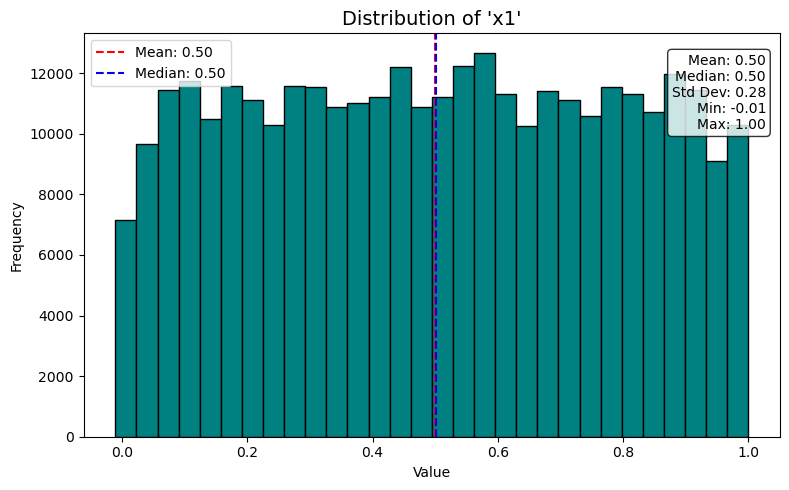

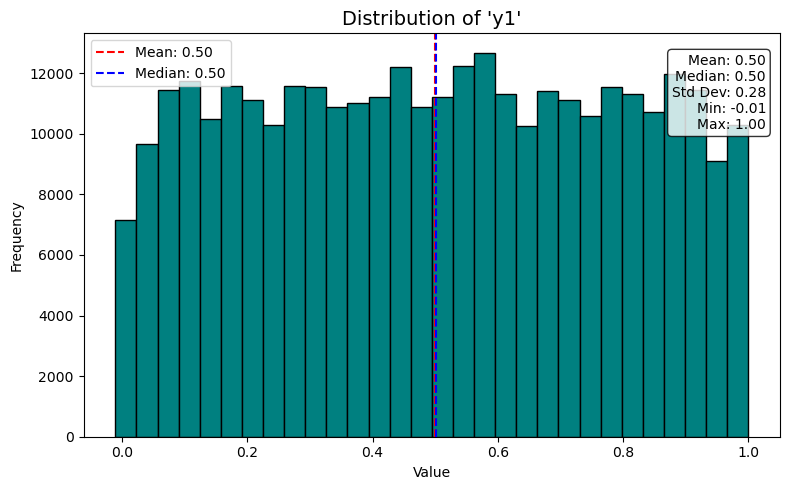

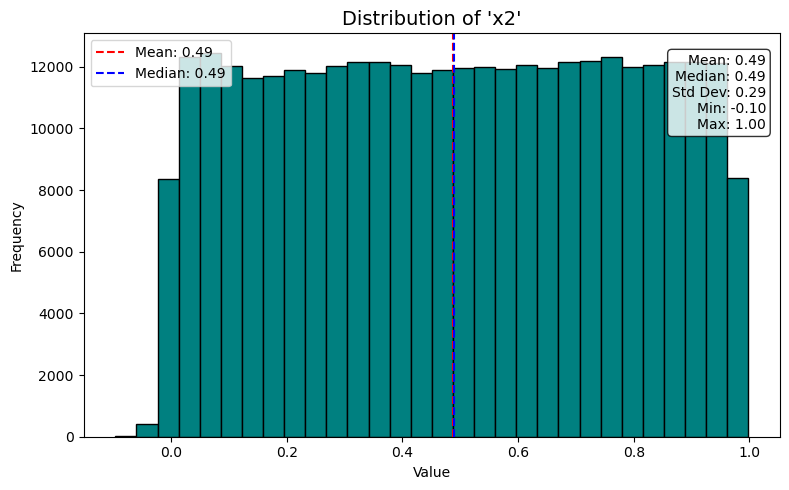

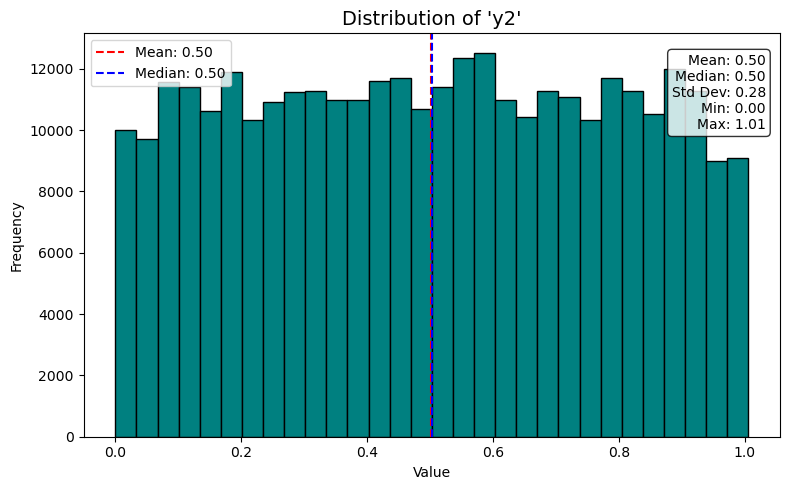

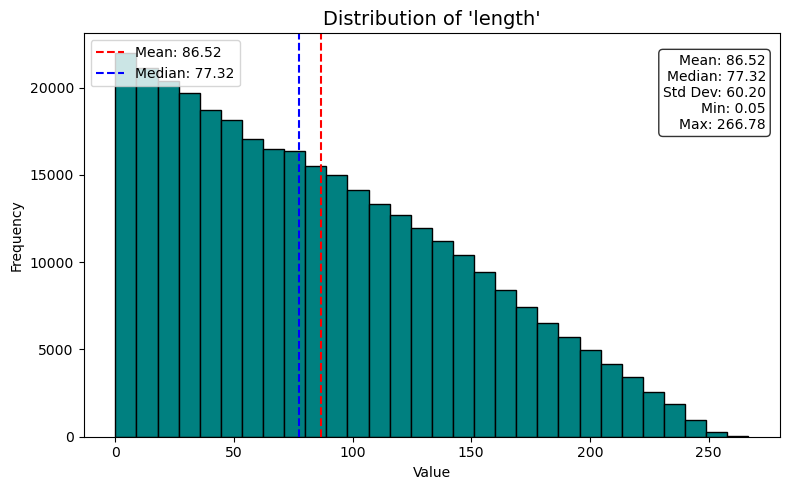

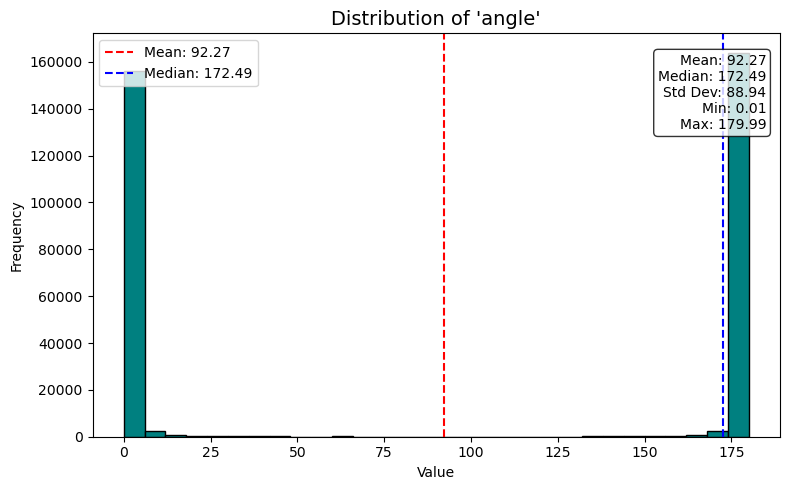

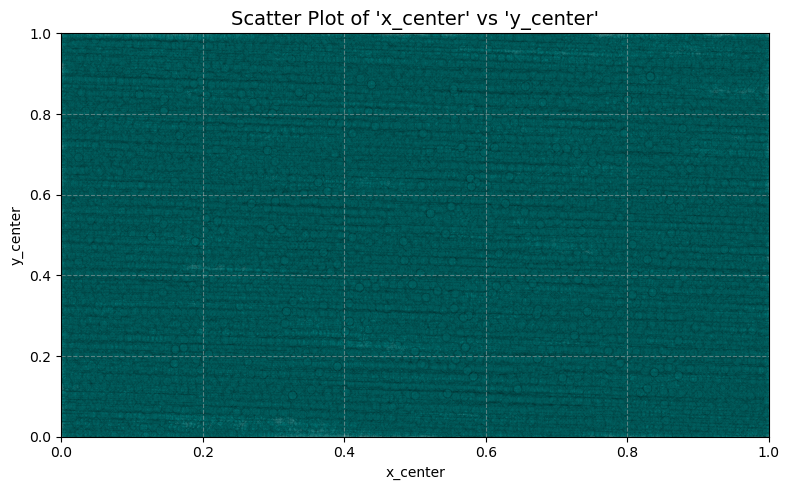

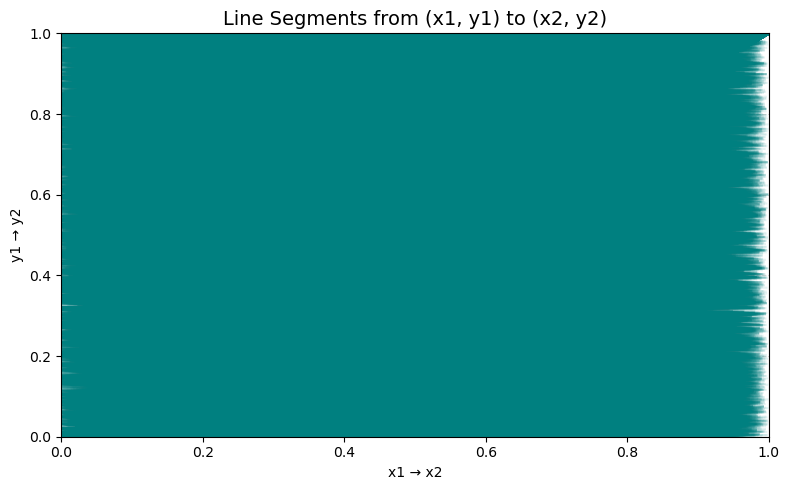

In [4]:
# plots_save_path = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/RME03Star/plots/"
plots_save_path = os.path.join(satsim_path, "plots")
data_statistics = local_satsim.statistics_file
#Plot all statistics collected in the file
for col_name, col_data in data_statistics.sample_attributes.items():
    column_type = detect_column_type(col_data)
    print(column_type)
    if column_type == "categorical":
        plot_categorical_column(col_data, filepath=plots_save_path, dpi=500)
    elif column_type == "numerical":
        plot_numerical_column(col_data, filepath=plots_save_path, dpi=500)
    elif column_type == "time":
        plot_time_column(col_data, filepath=plots_save_path, dpi=500)
for col_name, col_data in data_statistics.annotation_attributes.items():
    column_type = detect_column_type(col_data)
    if column_type == "categorical":
        plot_categorical_column(col_data, filepath=plots_save_path, dpi=500)
    elif column_type == "numerical":
        plot_numerical_column(col_data, filepath=plots_save_path, dpi=500)


#Plot the x and y locations of the annotations
x_locations=data_statistics.annotation_attributes["x_center"]
y_locations=data_statistics.annotation_attributes["y_center"]
plot_scatter(x_locations, y_locations, alpha=.05, filepath=plots_save_path, dpi=500)

#Plot line segments
plot_lines(data_statistics.annotation_attributes["x1"], data_statistics.annotation_attributes["y1"],
           data_statistics.annotation_attributes["x2"], data_statistics.annotation_attributes["y2"],
           filepath=plots_save_path, dpi=500, alpha=.10)


## Plot Annotation View

['/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-27-07.106247/Annotations/sat_00000.0000.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-27-07.106247/Annotations/sat_00000.0001.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-27-07.106247/Annotations/sat_00000.0002.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-27-07.106247/Annotations/sat_00000.0003.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-27-07.106247/Annotations/sat_00000.0004.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-27-07.106247/Annotations/sat_00000.0005.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-29-13.558383/Annotations/sat_00000.0000.json'
 '/mnt/c/Users/david.chaparro/Documents/Repos/SatSim/output/2025-04-15T11-29-13.558383/Annotations/sat_00000.0001.json'
 '/mnt/c/Users/david.chaparro/Documents/

Plotting annotations:   2%|▏         | 7/414 [00:40<39:39,  5.85s/file]


KeyboardInterrupt: 

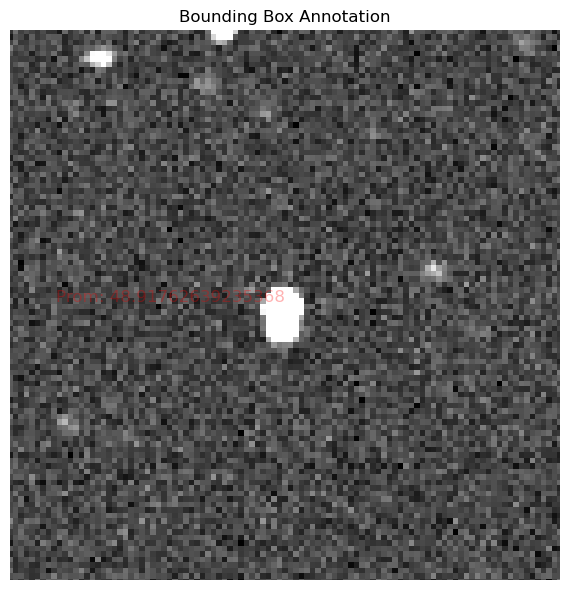

In [7]:
#Pandas dataframes for referenece
#Sample attributes searches parameters relevant to the sample in the dataset
image_attributes = local_satsim.statistics_file.sample_attributes
#Annotation attributes searches parameters relevant to the annotation in each sample
annotation_attributes = local_satsim.statistics_file.annotation_attributes

print(image_attributes[image_attributes["num_sats"] > 4]["json_path"].values)

# plot_annotation_subset(image_attributes[image_attributes["num_objects"] > 40], dataset_directory, view_star=False, view_image=True)
plot_annotation_subset(image_attributes[image_attributes["num_sats"] > 4], local_satsim, view_satellite=True, view_image=True)
# temp = annotation_attributes[annotation_attributes["measured_snr"] < 2]
# plot_annotation_subset(temp, dataset_directory, view_star=True, view_image=True)
# with_sats = image_attributes[image_attributes["num_sats"] > 0]
# no_stars = with_sats[with_sats["num_stars"] == 0]
# plot_annotation_subset(no_stars, dataset_directory, view_star=False, view_image=True)